#Group Project Description

> Yong Chen

> Minghao Zhao

> Tianchang Huang

> Wenjuan Li

---

##Sentiment Analysis for Financial News

1. Load Data and Data Preprocessing
2. Data Visualization
3. Training and Predicting
  *   Logistic Regression
  *   SVC
  *   Random Forest
  *   Decision Tree
  *   Neural Network
  *   AdaBoost
4. Compare 5-fold CV
5. Try DNN and CNN with Keras
5. Tune Hyperparameters by Random Search and Implement SMOTE to deal with inbalanced samples
7. Various Accuracy Evaluation
  *   Plot ROC of Multiple Classes
  *   Plot Confusion Matrix
8.  Practice sentiment analysis on a list of Headlines from Reuters 








In [1]:
# PART 1 Load Data and Data Preprocessing
# Load Data
import os
os.environ['KAGGLE_USERNAME'] = "wenjuanli" # username from the json file
os.environ['KAGGLE_KEY'] = "fe3a506ae4e1aee65e4230d032a2623d" # key from the json file
!kaggle datasets download -d ankurzing/sentiment-analysis-for-financial-news
!unzip \*.zip
import pandas as pd
data = pd.read_csv('all-data.csv', encoding='latin-1', names=['sentiment', 'text'])
data.head()
#print(data.head())

sentiment-analysis-for-financial-news.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sentiment-analysis-for-financial-news.zip
replace FinancialPhraseBank/FinancialPhraseBank-v1.0/License.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FinancialPhraseBank/FinancialPhraseBank-v1.0/License.txt  
replace FinancialPhraseBank/FinancialPhraseBank-v1.0/README.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FinancialPhraseBank/FinancialPhraseBank-v1.0/README.txt  
replace FinancialPhraseBank/FinancialPhraseBank-v1.0/Sentences_50Agree.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FinancialPhraseBank/FinancialPhraseBank-v1.0/Sentences_50Agree.txt  
replace FinancialPhraseBank/FinancialPhraseBank-v1.0/Sentences_66Agree.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FinancialPhraseBank/FinancialPhraseBank-v1.0/Sentences_66Agree.txt  
replace FinancialPhraseBank/FinancialPhraseBank-v1.0/Sentences_75Agree.tx

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [2]:
# Text Preprocessing
# remove stopwords commonly used, like 'the','a','an','in'and punctuations
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from string import punctuation
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop.update(punctuation)
print(stop)
def pos_tag_convert_penn_to_wn(tag):
    """
    Convert POS tag from Penn tagset to WordNet tagset.
    :param tag: a tag from Penn tagset
    :return: a tag from WordNet tagset or None if no corresponding tag could be found
    """
    from nltk.corpus import wordnet as wn

    if tag in ['JJ', 'JJR', 'JJS']:
        return wn.ADJ
    elif tag in ['RB', 'RBR', 'RBS']:
        return wn.ADV
    elif tag in ['NN', 'NNS', 'NNP', 'NNPS']:
        return wn.NOUN
    elif tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']:
        return wn.VERB
    else:
      return wn.NOUN 
from nltk import pos_tag
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
#  remove inflectional endings only and to return the base or dictionary form of a word
# dogs -> dog
# bring context to the words
# One major difference with stemming is that lemmatize takes a part of speech parameter, “pos” If not supplied, the default is “noun.”
# better-> good 
lemmatizer = WordNetLemmatizer()
def clean_review(text):
    clean_text = []
    for w in word_tokenize(text):
        if w.lower() not in stop:
            pos = pos_tag([w])
            new_w = lemmatizer.lemmatize(w, pos=pos_tag_convert_penn_to_wn(pos[0][1]))
            clean_text.append(new_w)
    return clean_text

def join_text(text):
    return " ".join(text)
data.text = data.text.apply(clean_review)
data.text = data.text.apply(join_text)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
{'no', 'd', 'ain', 'mustn', "wasn't", '&', ']', '!', 'below', 'how', '}', 'were', 'a', 'his', 'you', 'has', 'that', 'me', 'after', 'by', 'in', 'hers', 'y', 'haven', 'against', 'should', '#', 'above', 'mightn', '-', "hadn't", 'itself', 'those', 'this', 'to', 're', 'few', 'shan', 'the', 'will', "wouldn't", '\\', 'they', 'doing', 'does', "shouldn't", "mustn't", '.', "you'll", 'out', 'we', 'very', 'such', "it's", 's', "don't", 'any', 'himself', 't', 'didn', '$', "she

,sentiment,text
0,neutral,According Gran company plan move production Ru...
1,neutral,"Technopolis plan develop stage area less 100,0..."
2,negative,international electronic industry company Elco...
3,positive,new production plant company would increase ca...
4,positive,According company 's update strategy year 2009...


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


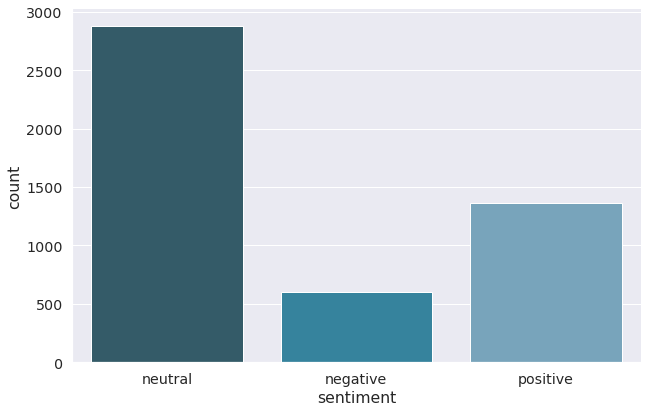

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.set(font_scale=1.3)
sns.factorplot(x="sentiment", data=data, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show()
# The class labels are imbalanced as we can see below in the chart. 
# This is something that we should keep in mind during the model training phase.

In [5]:

'''
pos = X_train.loc[y_train=='positive']
neg = X_train.loc[y_train=='negative']
neutral = X_train.loc[y_train=='negative']
'''

"\npos = X_train.loc[y_train=='positive']\nneg = X_train.loc[y_train=='negative']\nneutral = X_train.loc[y_train=='negative']\n"

In [6]:
# Data Visualization of training sets
# play with wordcloud into any shape:)
!git clone https://github.com/amueller/word_cloud.git
!cd word_cloud
!pip install wordcloud
from wordcloud import WordCloud
import numpy as np
import os
import zipfile
from google.colab import files
#from IPython.display import Image
from PIL import Image
uploaded=files.upload()
wc_masks = Image.open('neutral.png')



fatal: destination path 'word_cloud' already exists and is not an empty directory.


Saving neutral.png to neutral (2).png


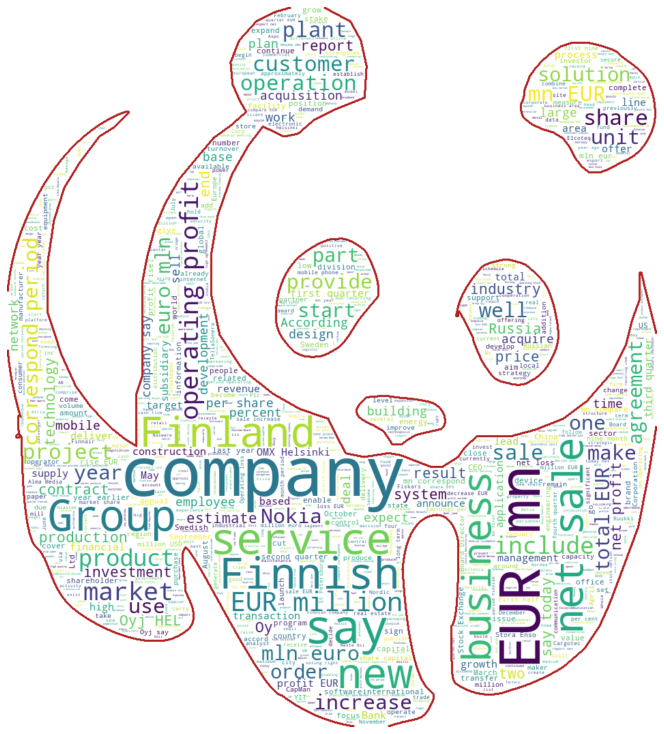

In [7]:
# The way the masking functions of wordcloud works is that it requires all white part of the mask should be 255 not 0 (integer type)
# swap all zeros to 255
#from IPython.display import Image
#display(Image(imagePaths[1]))
wc_masks = np.array(wc_masks)
wc_masks[wc_masks == 0] = 255
# Create a word cloud image just for fun
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10)) 
wordcloud = WordCloud(background_color="white",contour_width=3,
                      max_words = 2000 ,mask=wc_masks,contour_color='firebrick',
                      width = 800 , height = 400).generate(" ".join(data['text']))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


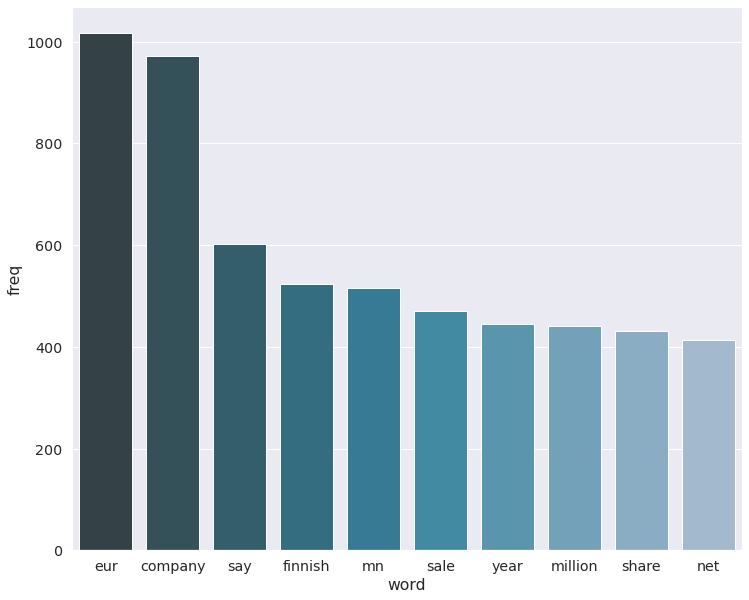

((3876, 4000), (970, 4000), (3876,), (970,))

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import collections
import numpy as np
import matplotlib.pyplot as plt
# Convert a collection of text documents to a matrix of token counts
# This implementation produces a sparse representation of the counts
cv = CountVectorizer(max_features=4000, ngram_range=(1,2), max_df=0.9, min_df=0)
# max_features only consider the top max_features ordered by term frequency across the corpus.
# max_df insures to remove most frequent words as we discussed earlier.
# such as what showed in the wordclouds, "EUR", "Finnish", "Company"
# ngram_range (1, 2) means unigrams and bigrams
bow = cv.fit_transform(data.text)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(10), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show()
# Split dataset
from sklearn.model_selection import train_test_split
# set the fixed numbers to the random_state guarantee that same sequence of random numbers are generated each time you run the code
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(data['sentiment'].values)
# dimensionality  reduction to save some speed
bow = bow.todense()
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(bow)
from sklearn.decomposition import PCA
X_pca = PCA(random_state = 42).fit_transform(X_std)
'''
# pca is not helpful here
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(data['sentiment'].values)
X_train,X_test,y_train,y_test = train_test_split(data.text,y,test_size = 0.2 , random_state = 42)
X_train_features = cv.fit_transform(X_train).todense()
X_test_features = cv.transform(X_test).todense()
X_train_features.shape, X_test_features.shape,y_train.shape,y_test.shape

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Loop thru classifiers and see the classification report

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM","Logistic Regression", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
classifiers = [
               KNeighborsClassifier(n_neighbors=5, p=2,metric='minkowski'),
               SVC(kernel="linear", C=1.0,random_state=0),
               SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0),
               LogisticRegression(),
               DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0),
               RandomForestClassifier(criterion='entropy',max_depth=5,n_estimators=10,random_state=1),
               MLPClassifier(alpha=1, max_iter=1000),
               AdaBoostClassifier(),
               GaussianNB(),
               QuadraticDiscriminantAnalysis()
               ]
scores = []
std = []
for i in range(len(names)):
  clf = classifiers[i]
  clf.fit(X_train_features, y_train)
  y_pred = clf.predict(X_test_features)
  score = cross_val_score(estimator = clf,X=X_train_features,y=y_train,cv = 5,n_jobs=-1)
  scores.append(np.mean(score))
  std.append(np.std(score))

  print('Classficiation Report of {}'.format(names[i]))
  print(classification_report(y_test, y_pred))
  print('-'*80)

results = pd.DataFrame(data = np.transpose([scores,std]),index = names,columns=['CV accuracy','Standard Deviation'])
pd.options.display.float_format = '{:.3f}'.format
print('-'*80)
print("5-fold Cross Validation Scores")
display(results)
'''
Precision is the ability of a classiifer not to label an instance positive that is actually negative
Recall is the ability of a classifier to find all positive instances.
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
Support is the number of actual occurrences of the class in the specified dataset. 
Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing
'''

Classficiation Report of Nearest Neighbors
              precision    recall  f1-score   support

           0       0.62      0.25      0.36       110
           1       0.65      0.98      0.78       571
           2       0.69      0.15      0.25       289

    accuracy                           0.65       970
   macro avg       0.66      0.46      0.46       970
weighted avg       0.66      0.65      0.58       970

--------------------------------------------------------------------------------
Classficiation Report of Linear SVM
              precision    recall  f1-score   support

           0       0.54      0.60      0.57       110
           1       0.78      0.82      0.80       571
           2       0.66      0.56      0.61       289

    accuracy                           0.72       970
   macro avg       0.66      0.66      0.66       970
weighted avg       0.71      0.72      0.71       970

------------------------------------------------------------------------------

,CV accuracy,Standard Deviation
Nearest Neighbors,0.649,0.005
Linear SVM,0.696,0.016
RBF SVM,0.700,0.003
Logistic Regression,0.741,0.019
Decision Tree,0.666,0.013
Random Forest,0.621,0.003
Neural Net,0.737,0.014
AdaBoost,0.724,0.010
Naive Bayes,0.592,0.014
QDA,0.232,0.017


In [17]:
#DNN with Keras
# output labels should be one-hot vectors - ie,
# 0 -> [0, 0, 1]
# 1 -> [0, 1, 0]
# 2 -> [1, 0, 0]
# this operation changes the shape of y from (10000,1) to (10000, 3)
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
y_train_tc = to_categorical(y_train)
y_test_tc = to_categorical(y_test)
dnn = Sequential()
dnn.add(Dense(units=512, activation='relu', input_dim=X_train_features.shape[1]))
dnn.add(Dropout(0.2))
dnn.add(Dense(units=256, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(Dense(units=3, activation='softmax'))
dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = dnn.fit(X_train_features, y_train_tc, validation_data=(X_test_features, y_test_tc), epochs=15, verbose=1)



Using TensorFlow backend.


Train on 3876 samples, validate on 970 samples
Epoch 1/15
3876/3876 [==============================] - 4s 994us/step - loss: 0.7648 - accuracy: 0.6731 - val_loss: 0.6098 - val_accuracy: 0.7526
Epoch 2/15
3876/3876 [==============================] - 4s 963us/step - loss: 0.3147 - accuracy: 0.8854 - val_loss: 0.7072 - val_accuracy: 0.7320
Epoch 3/15
3876/3876 [==============================] - 4s 960us/step - loss: 0.0915 - accuracy: 0.9714 - val_loss: 1.0360 - val_accuracy: 0.7433
Epoch 4/15
3876/3876 [==============================] - 4s 978us/step - loss: 0.0374 - accuracy: 0.9907 - val_loss: 1.1505 - val_accuracy: 0.7237
Epoch 5/15
3876/3876 [==============================] - 4s 960us/step - loss: 0.0263 - accuracy: 0.9933 - val_loss: 1.2034 - val_accuracy: 0.7371
Epoch 6/15
3876/3876 [==============================] - 4s 956us/step - loss: 0.0166 - accuracy: 0.9961 - val_loss: 1.2426 - val_accuracy: 0.7402
Epoch 7/15
3876/3876 [==============================] - 4s 955us/step - loss:

In [29]:
# CNN with Keras
# must convert the matrix to array and then reshape
from keras.models import Sequential
from keras.layers import Convolution2D, Dense, Dropout, Flatten, MaxPooling2D

import numpy as np
# Conv2D repuirements
# process the data to fit in a keras CNN properly
# input data needs to be (N, C, X, Y) - shaped where
# N - number of samples
# C - number of channels per sample
# (X, Y) - sample size

nrows_train = X_train_features.shape[0]
ncols_train = X_train_features.shape[1]

cnn = Sequential()

cnn.add(Convolution2D(64, 3, 1,border_mode="same",activation="relu",input_shape=(1, ncols_train, 1)))
cnn.add(MaxPooling2D(pool_size=(1,2)))

cnn.add(Convolution2D(128, 3, 1, border_mode="same", activation="relu"))
cnn.add(MaxPooling2D(pool_size=(1,2)))
   
cnn.add(Convolution2D(256, 3, 1, border_mode="same", activation="relu"))
cnn.add(MaxPooling2D(pool_size=(1,2)))
   
cnn.add(Flatten())
cnn.add(Dense(1024, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(3, activation="softmax"))



X_train_cnn = np.reshape(np.asarray(X_train_features),(nrows_train,1,ncols_train,1))
X_test_cnn = np.matrix.reshape(np.asarray(X_test_features),(nrows_test,1,ncols_train,1))

# define optimizer and objective, compile cnn
cnn.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
# train
cnn.fit(X_train_cnn, y_train_tc, validation_data=(X_test_cnn, y_test_tc), batch_size = 252,epochs=10, verbose=1)

Train on 3876 samples, validate on 970 samples
Epoch 1/10
3876/3876 [==============================] - 182s 47ms/step - loss: 0.8632 - accuracy: 0.6182 - val_loss: 0.7039 - val_accuracy: 0.7072
Epoch 2/10
3876/3876 [==============================] - 180s 46ms/step - loss: 0.6369 - accuracy: 0.7327 - val_loss: 0.6880 - val_accuracy: 0.7031
Epoch 3/10
3876/3876 [==============================] - 180s 46ms/step - loss: 0.5675 - accuracy: 0.7644 - val_loss: 0.7031 - val_accuracy: 0.7082
Epoch 4/10
3876/3876 [==============================] - 179s 46ms/step - loss: 0.4917 - accuracy: 0.7985 - val_loss: 0.7590 - val_accuracy: 0.7196
Epoch 5/10
3876/3876 [==============================] - 179s 46ms/step - loss: 0.4171 - accuracy: 0.8287 - val_loss: 0.7562 - val_accuracy: 0.7010
Epoch 6/10
3876/3876 [==============================] - 179s 46ms/step - loss: 0.3176 - accuracy: 0.8800 - val_loss: 0.9419 - val_accuracy: 0.7093
Epoch 7/10
3876/3876 [==============================] - 179s 46ms/step 

In [7]:
# Handling with unbalanced samples by SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV
# Try RandomOverSampler if has time
# use SMOTE during K-fold cross validation
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# use the neural network with the highest CV scores
# WHY random search instead of grid search?
'''
With small data sets and lots of resources, 
Grid Search will produce accurate results. 
However, with large data sets, 
the high dimensions will greatly slow down computation time and be very costly.
In this instance, 
it is advised to use Randomized Search since the number of iterations is explicitly defined by the data scientist.
'''

# tune hyperParameters by random search
log_reg_params = {"penalty": [ 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4,verbose=1,n_jobs=-1)

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
# use the best estimators from above CV
for train, test in sss.split(X_train_features, y_train):
    SMOTE_pipeline = make_pipeline(SMOTE(sampling_strategy='minority',random_state = 777), rand_log_reg) 
    model = SMOTE_pipeline.fit(X_train_features[train], y_train[train])
    best_est = rand_log_reg.best_estimator_

y_pred_sm = best_est.predict(X_test_features)
sm_score = accuracy_score(y_test, y_pred_sm)
sm_score

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.7min finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   58.1s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.9min finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.5min finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min finished


0.6865979381443299

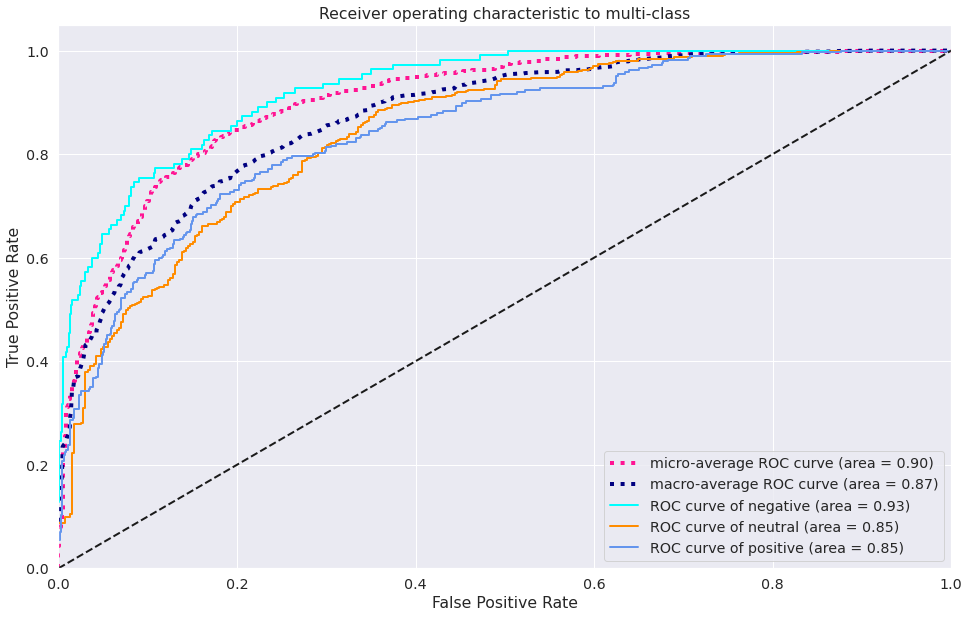

In [37]:
# Plot ROC and confusion matrix for the best algorithm after handling unbalanced samples
from sklearn.metrics import roc_curve, roc_auc_score,auc
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
# Compute ROC curve and ROC area for each class
n_classes = 3
class_name = np.unique(class_le.inverse_transform(np.argmax(y_test_tc,axis=1)))
# best-estimators
# # Learn to predict each class against the other
y_score = OneVsRestClassifier(best_est).fit(X_train_features, y_train_tc).decision_function(X_test_features)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_ = roc_curve(y_test_tc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_tc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (16,10))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(class_name[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


Confusion matrix, without normalization
[[ 70  28  12]
 [ 74 442  55]
 [ 29 106 154]]
Normalized confusion matrix
[[0.64 0.25 0.11]
 [0.13 0.77 0.1 ]
 [0.1  0.37 0.53]]


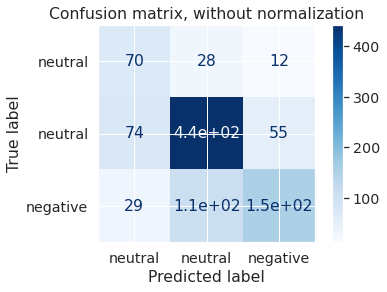

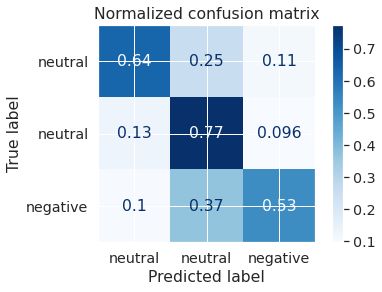

In [9]:
# plot confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = class_le.inverse_transform(y)
# best-estimators
for title, normalize in titles_options:
    disp = plot_confusion_matrix(best_est, X_test_features, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [72]:
# Test with raw headlines
headlines  = ['Fed Vice Chair Clarida says more support may be needed, but economy to rebound next quarter']
hd = cv.transform(headlines).todense()
hd_pred = best_est.predict(hd)
hd_label = class_le.inverse_transform(hd_pred)
print('Headlines of news:')
print(headlines)
print('Predicted Sentiment:')
print(hd_label)

Headlines of news:
['Fed Vice Chair Clarida says more support may be needed, but economy to rebound next quarter']
Predicted Sentiment:
['neutral']


In [106]:
# predict sentiments for a list of Headlines from Reuters
import requests
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
from IPython.display import HTML
url = 'https://www.reuters.com/news/archive/worldNews?date=today'
#hdr = {'User-Agent': 'Mozilla/5.0', 'Accept': 'text/html'}
res = requests.get(url)
html = res.content
soup = BeautifulSoup(html, 'html.parser')
uls = soup.find_all('h3',{'class':'story-title'})
#divs = soup.find_all('article',{"class":"story"})
for ul in uls:
    headlines = ul.get_text('h3',{'class':'story-title'})
    hd = cv.transform(list(headlines)).todense()
    hd_pred = best_est.predict(hd)
    hd_label = np.unique(class_le.inverse_transform(hd_pred))
    print('Headlines of news:')
    print(headlines)
    print('Predicted Sentiment:')
    print(hd_label)
    print('-'*80)

Headlines of news:
Transgender people face discrimination, violence amid Latin American quarantines
Predicted Sentiment:
['negative']
--------------------------------------------------------------------------------
Headlines of news:
U.S. expected to deport Iranian professor acquitted of sanctions busting: officials
Predicted Sentiment:
['negative']
--------------------------------------------------------------------------------
Headlines of news:
Fire breaks out at UAE residential tower, seven injuries reported
Predicted Sentiment:
['negative']
--------------------------------------------------------------------------------
Headlines of news:
Trump denies U.S. role in what Venezuela says was 'mercenary' incursion
Predicted Sentiment:
['negative']
--------------------------------------------------------------------------------
Headlines of news:
Major Brazilian cities set lockdowns as virus spreads
Predicted Sentiment:
['negative']
------------------------------------------------------

#References
1. Categorical encoding using Label-Encoding and One-Hot-Encoder
https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
2.Encoding Categorical Features
https://towardsdatascience.com/encoding-categorical-features-21a2651a065c 
3. Sentiment Analysis with Text Mining
https://towardsdatascience.com/sentiment-analysis-with-text-mining-13dd2b33de27
4. Report on Text Classification using CNN, RNN & HAN
https://medium.com/jatana/report-on-text-classification-using-cnn-rnn-han-f0e887214d5f
5. Generating WordClouds in Python
https://www.datacamp.com/community/tutorials/wordcloud-python 
6. Yet Another Twitter Sentiment Analysis Part 1 — tackling class imbalance
https://towardsdatascience.com/yet-another-twitter-sentiment-analysis-part-1-tackling-class-imbalance-4d7a7f717d44
7. sklearn.feature_extraction.text.CountVectorizer
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer
8. Python | Lemmatization with NLTK
https://www.geeksforgeeks.org/python-lemmatization-with-nltk/

9. Receiver Operating Characteristic (ROC)
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
10. sklearn.metrics.plot_confusion_matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
11. Grid Search vs Random Search
https://medium.com/@senapati.dipak97/grid-search-vs-random-search-d34c92946318
12. A Comparison of Grid Search and Randomized Search Using Scikit Learn
https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85
13. How to Develop 1D Convolutional Neural Network Models for Human Activity Recognition
https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/
